In [2]:
import os 
import pandas as pd
import numpy as np

# Data Import

In [3]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European")

data_euro_1 = pd.read_csv('34187551-GCST90014288-GO_0007568.h.tsv.gz', sep='\t')
data_euro_2 = pd.read_csv('34187551-GCST90014289-GO_0007568.h.tsv.gz', sep='\t')
data_euro_3 = pd.read_csv('34187551-GCST90014290-GO_0007568.h.tsv.gz', sep='\t')
data_euro_4 = pd.read_csv('34187551-GCST90014292-GO_0007568.h.tsv.gz', sep='\t')

In [ ]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African")

data_afri_1 = pd.read_csv('34187551-GCST90014294-GO_0007568.h.tsv.gz', sep='\t')
data_afri_2 = pd.read_csv('34187551-GCST90014295-GO_0007568.h.tsv.gz', sep='\t')
data_afri_3 = pd.read_csv('34187551-GCST90014296-GO_0007568.h.tsv.gz', sep='\t')
data_afri_4 = pd.read_csv('34187551-GCST90014298-GO_0007568.h.tsv.gz', sep='\t')

# Subset Creation 

In [70]:
def Create_Indices(data1, data2, data3, data4):
    
    #RESETTING THE INDEX
    data1.index = np.arange(len(data1))
    data2.index = np.arange(len(data2))
    data3.index = np.arange(len(data3))
    data4.index = np.arange(len(data4))

    snp_index_1 = []
    snp_index_2 = []
    snp_index_3 = []
    snp_index_4 = []

    for i in range(23):
        snp_index_1.append(data1.hm_rsid.loc[np.where(data1.hm_chrom==i+1)])
        snp_index_2.append(data2.hm_rsid.loc[np.where(data2.hm_chrom==i+1)])
        snp_index_3.append(data3.hm_rsid.loc[np.where(data3.hm_chrom==i+1)])
        snp_index_4.append(data4.hm_rsid.loc[np.where(data4.hm_chrom==i+1)])
        
    snp_index_aloha = []

    for i in range(23):
        l1 = list(set(snp_index_1[i]).intersection(snp_index_2[i]))
        l2 = list(set(l1).intersection(snp_index_3[i]))
        l3 = list(set(l2).intersection(snp_index_4[i]))

        snp_index_aloha.append(pd.Series(l3).dropna())
    
    
    filtered_snp_index_1 = []
    filtered_snp_index_2 = []
    filtered_snp_index_3 = []
    filtered_snp_index_4 = []


    for i in range(23):
        filtered_snp_index_1.append(list(set(data1.hm_rsid.loc[np.where(data1.p_value<0.3)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_2.append(list(set(data2.hm_rsid.loc[np.where(data2.p_value<0.3)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_3.append(list(set(data3.hm_rsid.loc[np.where(data3.p_value<0.3)]).intersection(snp_index_aloha[i])))
        filtered_snp_index_4.append(list(set(data4.hm_rsid.loc[np.where(data4.p_value<0.3)]).intersection(snp_index_aloha[i])))
    
    snp_index_aloha_filtered = []
    for i in range(23):
        l1 = list(set(filtered_snp_index_1[i]).intersection(filtered_snp_index_2[i]))
        l2 = list(set(l1).intersection(filtered_snp_index_3[i]))
        l3 = list(set(l2).intersection(filtered_snp_index_4[i]))

        snp_index_aloha_filtered.append(pd.Series(l3).dropna())
        
    return(snp_index_aloha, snp_index_aloha_filtered)
    

In [71]:
def Create_Subsets(data1, data2, data3, data4):
    
    snp_index_aloha, snp_index_aloha_filtered = Create_Indices(data1, data2, data3, data4)
    
    data1.index = data1.hm_rsid
    data2.index = data2.hm_rsid
    data3.index = data3.hm_rsid
    data4.index = data4.hm_rsid
    
    Created_Subsets = []
    
    for CHROM in range(23):
    
    
        #data_1_full = data1.loc[snp_index_aloha[CHROM]]
        #data_2_full = data2.loc[snp_index_aloha[CHROM]]
        #data_3_full = data3.loc[snp_index_aloha[CHROM]]
        #data_4_full = data4.loc[snp_index_aloha[CHROM]]

        data_1_filtered = data1.loc[snp_index_aloha_filtered[CHROM]]
        data_2_filtered = data2.loc[snp_index_aloha_filtered[CHROM]]
        data_3_filtered = data3.loc[snp_index_aloha_filtered[CHROM]]
        data_4_filtered = data4.loc[snp_index_aloha_filtered[CHROM]]


        TRAIT_1_filtered = data_1_filtered[
        ['hm_other_allele','hm_effect_allele','beta','standard_error']
        ]
        TRAIT_1_filtered=TRAIT_1_filtered.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
        TRAIT_2_filtered = data_2_filtered[
        ['beta','standard_error']
        ]
        TRAIT_3_filtered = data_3_filtered[
        ['beta','standard_error']
        ]
        TRAIT_4_filtered = data_4_filtered[
        ['beta','standard_error']
        ]

        S_XY_filtered = TRAIT_1_filtered
        S_XY_filtered['trait2_b']=TRAIT_2_filtered['beta']
        S_XY_filtered['trait2_se']=TRAIT_2_filtered['standard_error']
        S_XY_filtered['trait3_b']=TRAIT_3_filtered['beta']
        S_XY_filtered['trait3_se']=TRAIT_3_filtered['standard_error']
        S_XY_filtered['trait4_b']=TRAIT_4_filtered['beta']
        S_XY_filtered['trait4_se']=TRAIT_4_filtered['standard_error']
    
    
        #S_XY Export
        #S_XY_full.to_csv('Jupyter_Exports/Meta/S_XY_full{}.csv'.format(CHROM),index=True)
        
        Created_Subsets.append(S_XY_filtered)
        
        print("Chromosome {} complete".format(CHROM+1))
        
    return(Created_Subsets)

# European cohort

In [72]:
Euro_Subsets = Create_Subsets(data_euro_1, data_euro_2, data_euro_3, data_euro_4)

<ipython-input-70-b17b5d4f12a2>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snp_index_aloha.append(pd.Series(l3).dropna())
<ipython-input-70-b17b5d4f12a2>:48: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snp_index_aloha_filtered.append(pd.Series(l3).dropna())


Chromosome 1 complete
Chromosome 2 complete
Chromosome 3 complete
Chromosome 4 complete
Chromosome 5 complete
Chromosome 6 complete
Chromosome 7 complete
Chromosome 8 complete
Chromosome 9 complete
Chromosome 10 complete
Chromosome 11 complete
Chromosome 12 complete
Chromosome 13 complete
Chromosome 14 complete
Chromosome 15 complete
Chromosome 16 complete
Chromosome 17 complete
Chromosome 18 complete
Chromosome 19 complete
Chromosome 20 complete
Chromosome 21 complete
Chromosome 22 complete
Chromosome 23 complete


# African American cohort

In [73]:
Afri_Subsets = Create_Subsets(data_afri_1, data_afri_2, data_afri_3, data_afri_4)

<ipython-input-70-b17b5d4f12a2>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snp_index_aloha.append(pd.Series(l3).dropna())
<ipython-input-70-b17b5d4f12a2>:48: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snp_index_aloha_filtered.append(pd.Series(l3).dropna())


Chromosome 1 complete
Chromosome 2 complete
Chromosome 3 complete
Chromosome 4 complete
Chromosome 5 complete
Chromosome 6 complete
Chromosome 7 complete
Chromosome 8 complete
Chromosome 9 complete
Chromosome 10 complete
Chromosome 11 complete
Chromosome 12 complete
Chromosome 13 complete
Chromosome 14 complete
Chromosome 15 complete
Chromosome 16 complete
Chromosome 17 complete
Chromosome 18 complete
Chromosome 19 complete
Chromosome 20 complete
Chromosome 21 complete
Chromosome 22 complete
Chromosome 23 complete


# Calculating subset overlap for meta-analysis

In [74]:
def Overlap(Afri_Subsets, Euro_Subsets):
    lengths = []
    indices = []
    for CHROM in range(23):

    #os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/Jupyter_Exports/Meta")

        afri_chrom_filtered = Afri_Subsets[CHROM]
    #afri_chrom_full = pd.read_csv('S_XY_full{}.csv'.format(CHROM))
    


    #os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/Jupyter_Exports/Meta")

        eu_chrom_filtered = Euro_Subsets[CHROM]
    #eu_chrom_full = pd.read_csv('S_XY_full{}.csv'.format(CHROM))

        snp_index_fil_eu = eu_chrom_filtered.index
        snp_index_fil_afri = afri_chrom_filtered.index

    #snp_index_ful_eu = eu_chrom_full.hm_rsid
    #snp_index_ful_afri = afri_chrom_full.hm_rsid
    
        l1 = list(set(snp_index_fil_eu).intersection(snp_index_fil_afri))
    #l2 = list(set(snp_index_ful_eu).intersection(snp_index_ful_afri))
    
        print(len(l1))
        indices.append(l1)
        lengths.append(len(l1))
    
    return(indices, lengths)

In [75]:
def Export(Afri_Subsets, Euro_Subsets):
    
    Indices, Lengths = Overlap(Afri_Subsets, Euro_Subsets)

    for CHROM in range(23):
        afri_chrom_filtered = Afri_Subsets[CHROM]
    
        eu_chrom_filtered = Euro_Subsets[CHROM]

    
        eu_chrom_filtered.index = eu_chrom_filtered.index
    #eu_chrom_full.index = eu_chrom_full.hm_rsid
    
        afri_chrom_filtered.index = afri_chrom_filtered.index
    #afri_chrom_full.index = afri_chrom_full.hm_rsid

        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/Jupyter_Exports/META/0.3")

        META_S_XY_filtered = eu_chrom_filtered.loc[Indices[CHROM]]#.drop('hm_rsid',axis=1)
    #META_S_XY_full = eu_chrom_full.loc[l2].drop('hm_rsid',axis=1)
    
        META_S_XY_filtered.to_csv('META_S_XY_filtered{}.csv'.format(CHROM))
    #META_S_XY_full.to_csv('META_S_XY_full{}.csv'.format(CHROM))
    
    #eu_chrom_full.index = np.arange(len(eu_chrom_full))
    #META_S_XY_full_chunk_1 = eu_chrom_full.loc[:100]
    #META_S_XY_full_chunk_1.index = eu_chrom_full.hm_rsid.loc[:100]

    #META_S_XY_full_chunk_1.drop('hm_rsid',axis=1).to_csv('META_S_XY_full_chunk{}.csv'.format(CHROM))

    
        os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/Jupyter_Exports/META/0.3")

        META_S_XY_filtered = afri_chrom_filtered.loc[Indices[CHROM]]#.drop('hm_rsid',axis=1)
    #META_S_XY_full = afri_chrom_full.loc[l2].drop('hm_rsid',axis=1)

        META_S_XY_filtered.to_csv('META_S_XY_filtered{}.csv'.format(CHROM))
    #META_S_XY_full.to_csv('META_S_XY_full{}.csv'.format(CHROM))
    
    #afri_chrom_full.index = np.arange(len(afri_chrom_full))
    #META_S_XY_full_chunk_1 = afri_chrom_full.loc[:100]
    #META_S_XY_full_chunk_1.index = afri_chrom_full.hm_rsid.loc[:100]

    #META_S_XY_full_chunk_1.drop('hm_rsid',axis=1).to_csv('META_S_XY_full_chunk{}.csv'.format(CHROM))
    print(Lengths)
    return(Lengths)

In [76]:
Lengths = Export(Afri_Subsets, Euro_Subsets)
print(Lengths)

67
41
164
51
17
48
41
13
17
28
23
28
6
19
6
23
24
50
12
12
10
8
0
[67, 41, 164, 51, 17, 48, 41, 13, 17, 28, 23, 28, 6, 19, 6, 23, 24, 50, 12, 12, 10, 8, 0]
[67, 41, 164, 51, 17, 48, 41, 13, 17, 28, 23, 28, 6, 19, 6, 23, 24, 50, 12, 12, 10, 8, 0]


/Users/datasandwich/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Chromosome ID')

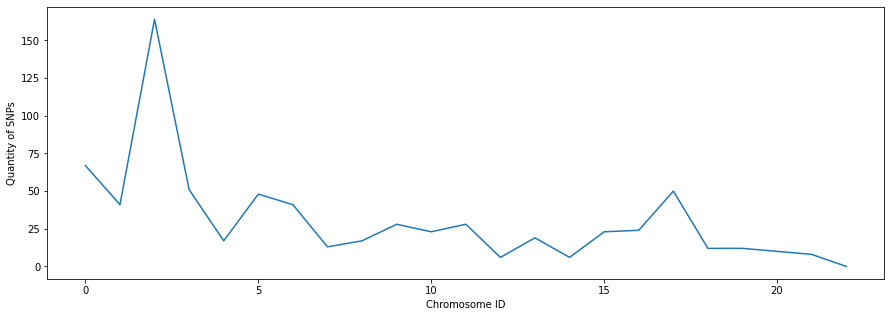

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(15,5) )
sns.lineplot(np.arange(23),Lengths)
plt.ylabel('Quantity of SNPs')
plt.xlabel('Chromosome ID')

In [12]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/Meta_Analysis")


result = []
p_value = []
significant_p_value = []
for CHROM in range(23):
    results = pd.read_csv('Meta_0.1_Results_Chrom_{}.csv'.format(CHROM+1),index_col=0)
    
    p_values = 10**(-results['-log10(p-val)'])
    p_value.append(p_values)
    print("Number of significant associations in Chromosome {} BEFORE correction: ".format(CHROM+1)
          ,len(p_values.iloc[np.where(p_values<0.05)]))
    
    adjusted_p_values = p_values*len(data1)
    significant_p_value.extend(results.index[np.where(adjusted_p_values<0.05)])

    p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]
    print("Number of significant associations in Chromosome {} AFTER correction: ".format(CHROM+1),len(p_values_corrected))

In [ ]:
import seaborn as sns
data1.index = data1.hm_rsid
plt.figure(figsize=(20,10))
for CHROM in range(23):
    sns.scatterplot(x=data1.loc[p_value[CHROM].index].hm_chrom,y=-np.log10(p_value[CHROM]),color='b')#label="Chromosome {}".format(CHROM+1))
plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-', label = "Significance threshold")
#plt.legend()



In [5]:
import numpy as np
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/Meta_Analysis")


result = []
p_value = []
significant_p_value = []

results = pd.read_csv('SPECIAL_Meta_Results_Chrom_3.csv',index_col=0)
    
p_values = 10**(-results['-log10(p-val)'])
p_value.append(p_values)
print("Number of significant associations in Chromosome {} BEFORE correction: "
          ,len(p_values.iloc[np.where(p_values<0.05)]))
    
adjusted_p_values = p_values*len(data_euro_1)
significant_p_value = results.index[np.where(adjusted_p_values<0.05)]

p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]
print("Number of significant associations in Chromosome {} AFTER correction: ",len(p_values_corrected))

Number of significant associations in Chromosome {} BEFORE correction:  69
Number of significant associations in Chromosome {} AFTER correction:  69


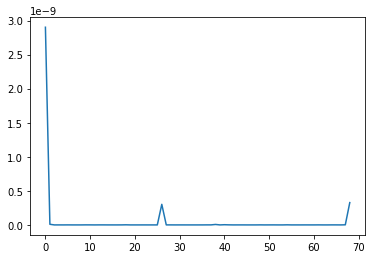

In [36]:
plt.plot(p_values)

/Users/datasandwich/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='-log10(p-val)'>

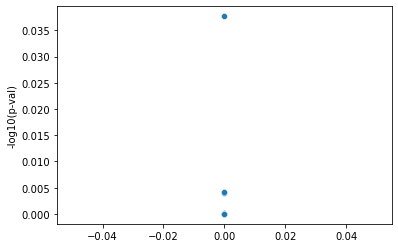

In [45]:
import seaborn as sns
sns.scatterplot(np.zeros(len(p_values_corrected)),p_values_corrected)

Text(0.5, 0, 'Chromosome ID')

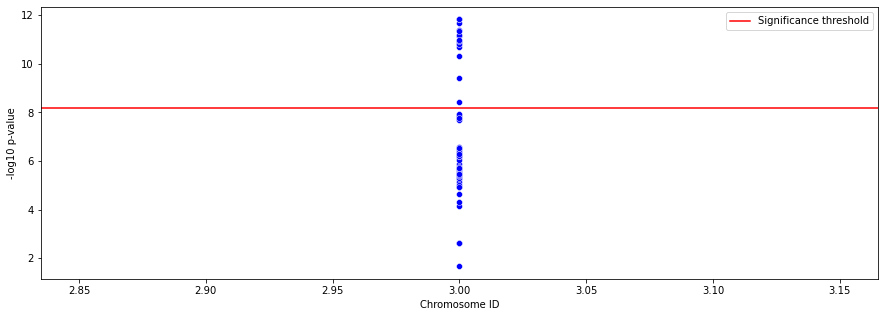

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#data1.index = data1.hm_rsid
plt.figure(figsize=(15,5))
sns.scatterplot(x=[3]*len(p_values_corrected),y=-np.log10(p_values_corrected),color='b')#label="Chromosome {}".format(CHROM+1))
plt.axhline(y = -np.log10(0.05/len(data_euro_1)), color = 'r', linestyle = '-', label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

In [7]:
import numpy as np

significant_snps_gwas = []
significant_snps_gwas.extend(data_euro_1.hm_rsid.iloc[np.where(data_euro_1.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_2.hm_rsid.iloc[np.where(data_euro_2.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_3.hm_rsid.iloc[np.where(data_euro_3.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_euro_4.hm_rsid.iloc[np.where(data_euro_4.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_1.hm_rsid.iloc[np.where(data_afri_1.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_2.hm_rsid.iloc[np.where(data_afri_2.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_3.hm_rsid.iloc[np.where(data_afri_3.p_value*len(data_euro_1)<0.05)])
significant_snps_gwas.extend(data_afri_4.hm_rsid.iloc[np.where(data_afri_4.p_value*len(data_euro_1)<0.05)])


In [20]:
overlapping_snps = list(set(significant_p_value).intersection(significant_snps_gwas))

main_list = list(  set(significant_p_value) - set(significant_snps_gwas))


In [21]:
overlapping_snps

['rs6802078',
 'rs1126828',
 'rs9880390',
 'rs9879730',
 'rs9289331',
 'rs28507350',
 'rs2712418',
 'rs2712384',
 'rs7647337',
 'rs2712407',
 'rs9848287',
 'rs2712372',
 'rs11918394',
 'rs2712383',
 'rs2712411',
 'rs9821829']

In [22]:
main_list

['rs9841987',
 'rs9852825',
 'rs2811499',
 'rs6787559',
 'rs7624160',
 'rs2811500',
 'rs2712409',
 'rs4443194',
 'rs7641584',
 'rs4857918',
 'rs4481171',
 'rs1127030',
 'rs2811497',
 'rs56141228',
 'rs2002849',
 'rs7613073',
 'rs9844071',
 'rs9880064',
 'rs10934859',
 'rs4494950',
 'rs2712412',
 'rs6439135',
 'rs9841041',
 'rs2811490',
 'rs7650934',
 'rs2253151',
 'rs1697',
 'rs2712417',
 'rs4481172',
 'rs11717358',
 'rs7627549',
 'rs7650156',
 'rs6806687',
 'rs3122175',
 'rs9879928',
 'rs9838579',
 'rs2001703',
 'rs2712419',
 'rs58977394',
 'rs2712381',
 'rs2878370',
 'rs2811491',
 'rs2811492',
 'rs67445542',
 'rs7647837',
 'rs2811488',
 'rs9842276',
 'rs9289332',
 'rs2811489',
 'rs2712371',
 'rs6801890',
 'rs2335236',
 'rs11717399']

In [12]:
significant_snps_gwas

['rs9386796',
 'rs13203155',
 'rs9487048',
 'rs1008084',
 'rs13219432',
 'rs6568570',
 'rs13219561',
 'rs9386795',
 'rs11961369',
 'rs6568569',
 'rs11757567',
 'rs9400273',
 'rs5005289',
 'rs13191948',
 'rs9386791',
 'rs9400272',
 'rs9374080',
 'rs7748918',
 'rs6932503',
 'rs1341271',
 'rs1546723',
 'rs9487023',
 'rs887466',
 'rs6930733',
 'rs13209277',
 'rs9487058',
 'rs9386797',
 'rs5012479',
 'rs9386787',
 'rs13195816',
 'rs9487053',
 'rs7757347',
 'rs9320282',
 'rs6927569',
 'rs6913093',
 'rs7744284',
 'rs7774377',
 'rs1546722',
 'rs6937752',
 'rs882072',
 'rs1320612',
 'rs1521908',
 'rs9386792',
 'rs9480922',
 'rs7773815',
 'rs882074',
 'rs4403290',
 'rs7755970',
 'rs9386794',
 'rs9480923',
 'rs9386780',
 'rs9386789',
 'rs9386793',
 'rs6924776',
 'rs9487038',
 'rs9400270',
 'rs9487036',
 'rs6903695',
 'rs9372211',
 'rs9487042',
 'rs9487039',
 'rs9400271',
 'rs9374079',
 'rs1111864',
 'rs7773331',
 'rs6924815',
 'rs9480920',
 'rs6902892',
 'rs9398197',
 'rs9487043',
 'rs419998',
 '

In [19]:
significant_p_value

Index(['rs9838579', 'rs4494950', 'rs2712372', 'rs2712381', 'rs2712384',
       'rs11717358', 'rs7613073', 'rs2712383', 'rs9289332', 'rs2712409',
       'rs2811492', 'rs6802078', 'rs2002849', 'rs1127030', 'rs2811490',
       'rs4443194', 'rs2001703', 'rs2712412', 'rs2712371', 'rs7641584',
       'rs9848287', 'rs7650934', 'rs7650156', 'rs6806687', 'rs1697',
       'rs9821829', 'rs67445542', 'rs2811497', 'rs2712417', 'rs9841987',
       'rs2811489', 'rs6787559', 'rs1126828', 'rs9880390', 'rs2712418',
       'rs9841041', 'rs2878370', 'rs2811491', 'rs9844071', 'rs4481172',
       'rs2335236', 'rs7647837', 'rs7624160', 'rs4857918', 'rs7627549',
       'rs9852825', 'rs56141228', 'rs9842276', 'rs2811499', 'rs2712407',
       'rs4481171', 'rs9879928', 'rs9879730', 'rs9289331', 'rs11717399',
       'rs7647337', 'rs2811500', 'rs11918394', 'rs10934859', 'rs9880064',
       'rs6801890', 'rs6439135', 'rs28507350', 'rs2712411', 'rs2712419',
       'rs3122175', 'rs2811488', 'rs58977394', 'rs2253151'],

In [27]:
results

,r_1,-log10(p-val)
rs9838579,0.007124,8.537432
rs4494950,0.008002,11.035527
rs2712372,0.009949,17.680560
rs2712381,0.008653,13.087439
rs2712384,0.009817,17.183039
...,...,...
rs2712419,0.008415,12.317718
rs3122175,0.008424,12.345598
rs2811488,0.008754,13.422086
rs58977394,0.008252,11.803921


In [25]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/Meta_Analysis")

pd.DataFrame(main_list).to_csv('SPECIAL_CHROM_2_NOVEL_ASSOCIATIONS.csv')

In [ ]:
results.index = results['Unnamed: 0']

In [34]:
10**(-results.loc[main_list]['-log10(p-val)'])*len(data_euro_1)

rs9841987     1.401410e-08
rs9852825     2.114922e-08
rs2811499     5.145119e-06
rs6787559     4.611868e-07
rs7624160     4.305563e-07
rs2811500     6.008529e-07
rs2712409     5.534871e-06
rs4443194     2.750159e-07
rs7641584     1.831320e-08
rs4857918     1.814582e-06
rs4481171     2.192430e-06
rs1127030     3.148151e-06
rs2811497     3.234942e-06
rs56141228    1.201905e-08
rs2002849     3.669727e-06
rs7613073     1.468082e-08
rs9844071     5.083147e-05
rs9880064     6.105080e-07
rs10934859    1.933482e-06
rs4494950     6.973408e-05
rs2712412     2.486467e-06
rs6439135     4.123306e-06
rs9841041     6.399067e-07
rs2811490     7.534673e-07
rs7650934     1.321815e-08
rs2253151     2.478653e-03
rs1697        3.132588e-07
rs2712417     2.512136e-06
rs4481172     8.752034e-07
rs11717358    3.443456e-06
rs7627549     2.110748e-06
rs7650156     6.255091e-07
rs6806687     3.867165e-09
rs3122175     3.414869e-06
rs9879928     3.150707e-06
rs9838579     2.195531e-02
rs2001703     3.682086e-07
r